In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [3]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


Text(0, 0.5, 'Signal change')

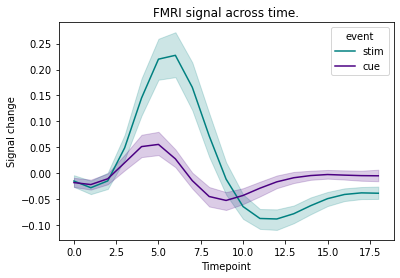

In [7]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", palette = ["teal", "indigo"], data = fmri)
plt.title("FMRI signal across time.")
plt.xlabel("Timepoint")
plt.ylabel("Signal change")

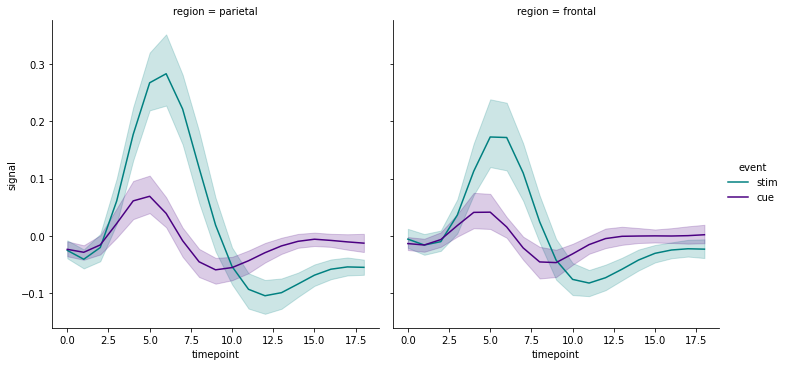

In [10]:
sns.relplot(x = "timepoint", y = "signal", col = "region", hue = "event", palette = ["teal", "indigo"], kind = "line", data = fmri)

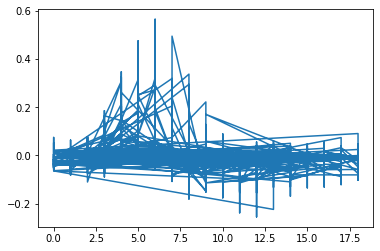

In [11]:
plt.plot(fmri.timepoint, fmri.signal)

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

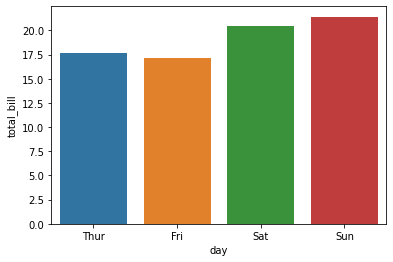

In [15]:
sns.barplot(x = "day", y = "total_bill", data = tips, ci = None)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

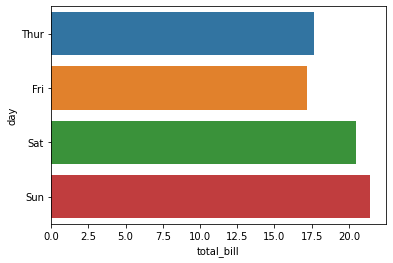

In [16]:
sns.barplot(x = "total_bill", y = "day", data = tips, ci = None)

<BarContainer object of 244 artists>

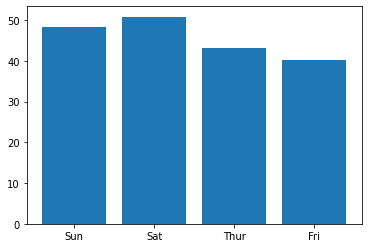

In [17]:
plt.bar(tips.day, tips.total_bill)

In [27]:
male = tips[tips["sex"] == "Male"]
female = tips[tips["sex"] == "Female"]

mday = male.groupby("day").mean()
fday = female.groupby("day").mean()

totals = mday.merge(fday, left_index = True, right_index = True)
totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y
day,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444


In [29]:
totals['Total'] = totals["tip_x"] + totals["tip_y"]
totals['prop_m'] = np.true_divide(totals["tip_x"], totals["Total"]) * 100
totals['prop_f'] = np.true_divide(totals["tip_y"], totals["Total"]) * 100

totals

,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,Total,prop_m,prop_f
day,,,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958,53.642111,46.357889
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111,49.195202,50.804798
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684,52.396600,47.603400
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567,48.885192,51.114808


<BarContainer object of 4 artists>

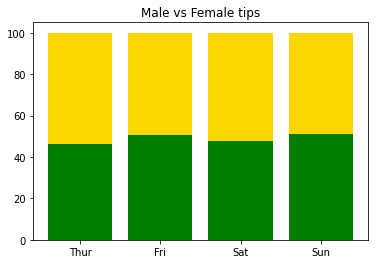

In [31]:
plt.bar(totals.index, totals.prop_m, label = "Male", color = "gold", bottom = totals.prop_f)
plt.title("Male vs Female tips")
plt.bar(totals.index, totals.prop_f, label = "Female", color = "green")

In [34]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


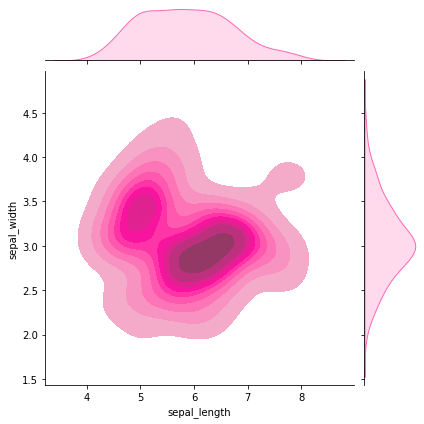

In [40]:
sns.jointplot(x = iris['sepal_length'], y = iris['sepal_width'], color = "hotpink", kind = 'kde', fill = True)

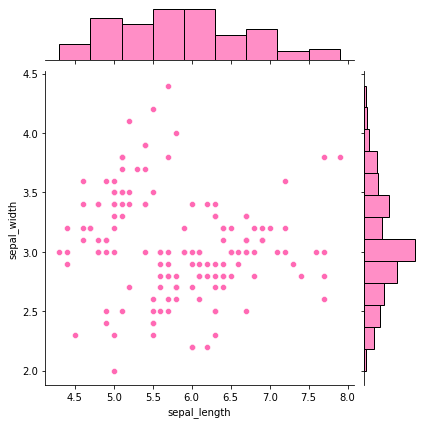

In [37]:
sns.jointplot(x = iris['sepal_length'], y = iris['sepal_width'], color = "hotpink", kind = 'scatter')

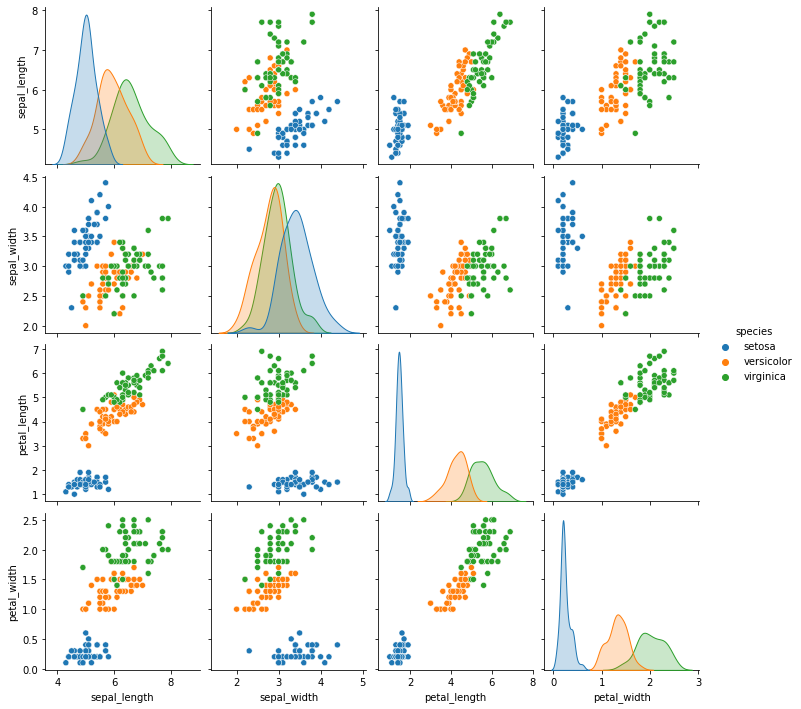

In [41]:
sns.pairplot(iris, hue = "species")